In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from sklearn import preprocessing

In [2]:
data = pd.read_csv("../data/kc_house_data.csv")
print(data.dtypes)
data.head()

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
data['square'] = (data['sqft_living'] + data['sqft_lot'] + data['sqft_above'] + data['sqft_basement'])
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,square
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,8010
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,12382
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,11540
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,8920
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,11440


In [4]:
data['UnitPrice'] = data['price']/(data['square'])
data['UnitPrice'].describe()

count    21613.000000
mean        46.530376
std         31.035134
min          0.162920
25%         24.176744
50%         38.683603
75%         61.602113
max        248.552124
Name: UnitPrice, dtype: float64

In [5]:
def setUnitPrice(row):
    if row["UnitPrice"] < 10:
        return 0
    elif row["UnitPrice"] < 20:
        return 1
    elif row["UnitPrice"] < 30:
        return 2
    elif row["UnitPrice"] < 40:
        return 3
    elif row["UnitPrice"] < 50:
        return 4
    elif row["UnitPrice"] < 60:
        return 5
    elif row["UnitPrice"] < 70:
        return 6
    elif row["UnitPrice"] < 80:
        return 7
    elif row["UnitPrice"] < 90:
        return 8
    elif row["UnitPrice"] < 100:
        return 9
    elif row["UnitPrice"] < 120:
        return 10
    elif row["UnitPrice"] < 150:
        return 11
    elif row["UnitPrice"] < 200:
        return 12
    else:
        return 13
data = data.assign(UnitPrice = data.apply(setUnitPrice,axis = 1))

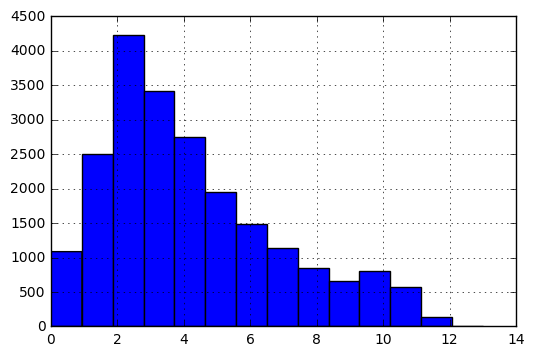

In [6]:
hist = data['UnitPrice'].hist(bins=14)

In [7]:
def setIsRenovate(row):
    if row["yr_renovated"] == 0:
        return 0
    else:
        return 1
data = data.assign(IsRenovate = data.apply(setIsRenovate,axis = 1))
#data = data.assign(IsRenovate = lambda x: 1 if x.yr_renovated != 0 else 0)

In [8]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,square,UnitPrice,IsRenovate
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,8010,2,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,12382,4,1
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,11540,1,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,8920,6,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,11440,4,0


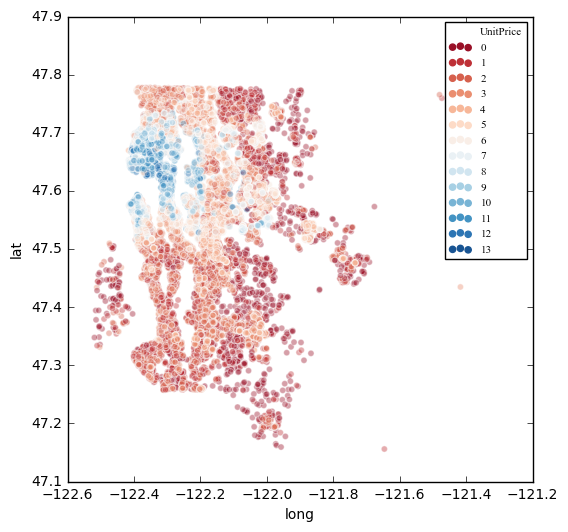

In [9]:
plt.figure(figsize=(6,6))
sns.scatterplot(x="long", y="lat", hue="UnitPrice", palette=sns.color_palette("RdBu", n_colors=14), data=data, legend="brief", alpha=0.4)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.show()

In [10]:
print(data.dtypes)
data.head()

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
square             int64
UnitPrice          int64
IsRenovate         int64
dtype: object


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,square,UnitPrice,IsRenovate
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,8010,2,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,12382,4,1
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,11540,1,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,8920,6,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,11440,4,0


In [11]:
feature = ["long", "lat", "bedrooms", "bathrooms","floors", "waterfront", "view", 
           "condition", "grade", "yr_built", "IsRenovate", "square"]
data_X = data[feature]
data_y = data["UnitPrice"]

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data_X, data_y, test_size=0.25, random_state=61)
plotdata = X_test.copy()
plotdata['GroundTruth'] = data['UnitPrice'].copy()
print(X_train.shape)
print(X_test.shape)

(16209, 12)
(5404, 12)


In [13]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=150, random_state=61)
clf.fit(X_train, y_train)
predict = clf.predict(X_test)
print("feature:",feature)
print("feature_importances:",clf.feature_importances_)
print("socre:",clf.score(X_test, y_test))

feature: ['long', 'lat', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'IsRenovate', 'square']
feature_importances: [ 0.15308894  0.2335108   0.04012758  0.06283918  0.02492601  0.00180896
  0.01814189  0.02810776  0.04770171  0.13097818  0.0065338   0.2522352 ]
socre: 0.544781643227


In [14]:
def setRight(row):
    if row["label"] == row["GroundTruth"]:
        return 1
    else:
        return 0

In [15]:
def setRightRange(row):
    if row["label"] == row["GroundTruth"] or row["label"] == row["GroundTruth"] + 1 or row["label"] == row["GroundTruth"] - 1 :
        return 1
    else:
        return 0

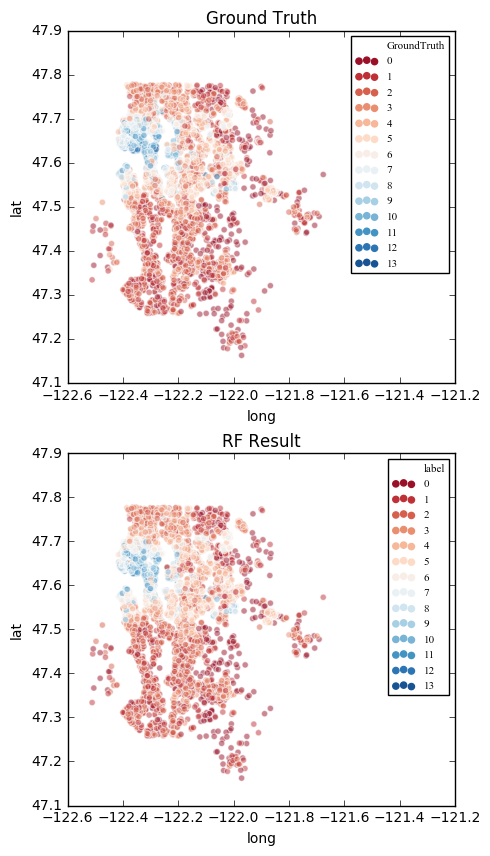

In [16]:
plt.figure(figsize=(5,10))
plotdata["label"] = predict
plotdata = plotdata.assign(isRight = plotdata.apply(setRight, axis = 1))
plt.subplot(2,1,1)
plt.title('Ground Truth') 
sns.scatterplot(x="long", y="lat", hue="GroundTruth", palette=sns.color_palette("RdBu", n_colors=14), data=plotdata, legend="brief", alpha=0.5)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.subplot(2,1,2)
plt.title('RF Result')
sns.scatterplot(x="long", y="lat", hue="label", palette=sns.color_palette("RdBu", n_colors=14), data=plotdata, legend="brief", alpha=0.5)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.show()

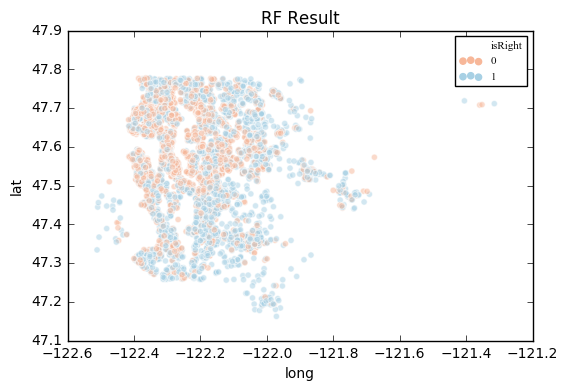

In [17]:
plt.title('RF Result')
sns.scatterplot(x="long", y="lat", hue="isRight", palette=sns.color_palette("RdBu", n_colors=2), data=plotdata, legend="brief", alpha=0.5)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
#plt.savefig('RF Result.png', dpi = 600)
plt.show()

countRight: 4878
Score: 0.90266469282


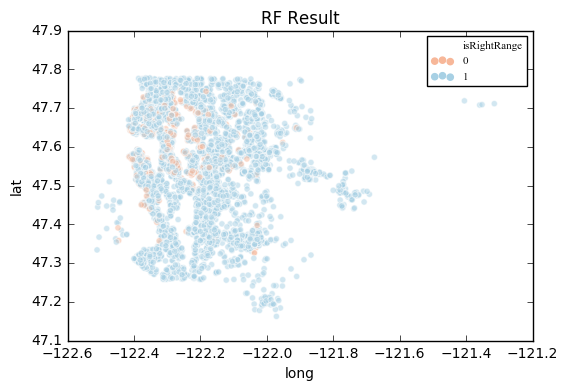

In [18]:
plotdata = plotdata.assign(isRightRange = plotdata.apply(setRightRange, axis = 1))
countRight = 0
for i in range(plotdata.shape[0]):
    if plotdata.iloc[i]["isRightRange"] == 1:
        countRight += 1
print("countRight:", countRight)
print("Score:", (countRight+0.0) / plotdata["isRightRange"].count())
plt.title('RF Result')
sns.scatterplot(x="long", y="lat", hue="isRightRange", palette=sns.color_palette("RdBu", n_colors=2), data=plotdata, legend="brief", alpha=0.5)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.savefig('RF Result Range.png', dpi = 600)
plt.show()

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=150, learning_rate=0.2, max_depth=5, random_state=61)
clf.fit(X_train, y_train)
predict = clf.predict(X_test)
print("feature:",feature)
print("feature_importances:",clf.feature_importances_)
print("socre:",clf.score(X_test, y_test))

feature: ['long', 'lat', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'IsRenovate', 'square']
feature_importances: [ 0.13218374  0.23691999  0.02695975  0.04876397  0.01878769  0.00116736
  0.01309408  0.0201726   0.04520425  0.10647922  0.00542778  0.30626813]
socre: 0.526646928201


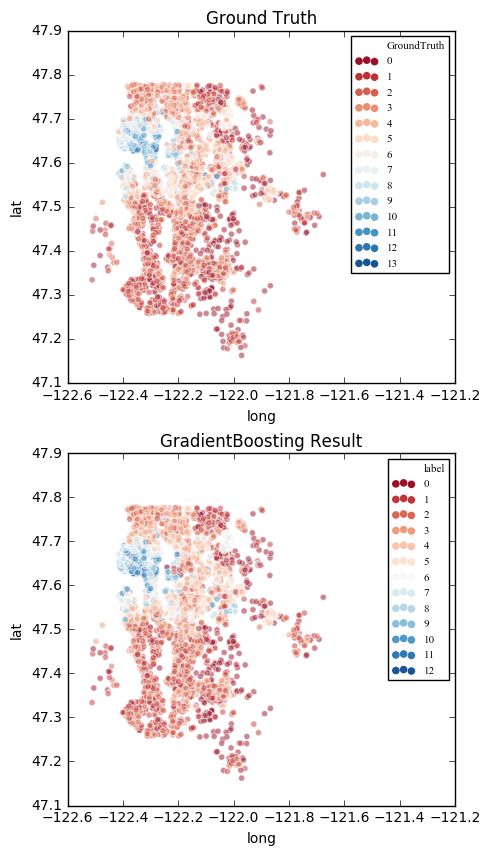

In [20]:
plt.figure(figsize=(5,10))
plotdata["label"] = predict
plotdata = plotdata.assign(isRight = plotdata.apply(setRight, axis = 1))
plt.subplot(2,1,1)
plt.title('Ground Truth') 
sns.scatterplot(x="long", y="lat", hue="GroundTruth", palette=sns.color_palette("RdBu", n_colors=14), data=plotdata, legend="brief", alpha=0.5)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.subplot(2,1,2)
plt.title('GradientBoosting Result')
sns.scatterplot(x="long", y="lat", hue="label", palette=sns.color_palette("RdBu", n_colors=13), data=plotdata, legend="brief", alpha=0.5)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.show()

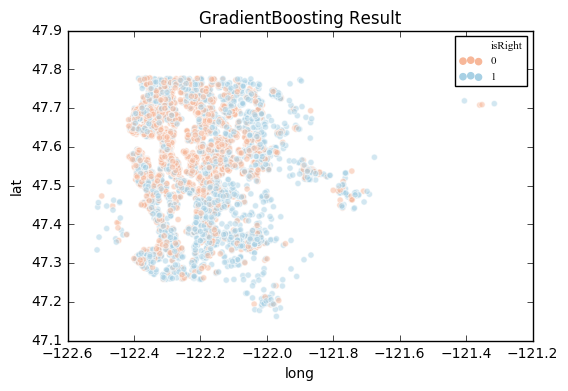

In [21]:
plt.title('GradientBoosting Result')
sns.scatterplot(x="long", y="lat", hue="isRight", palette=sns.color_palette("RdBu", n_colors=2), data=plotdata, legend="brief", alpha=0.5)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
#plt.savefig('GradientBoosting Result.png', dpi = 600)
plt.show()

countRight: 4802
Score: 0.888601036269


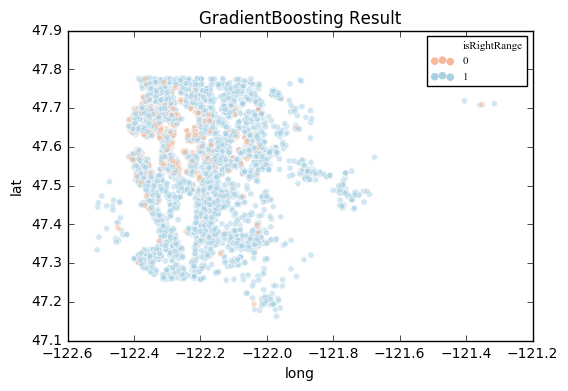

In [22]:
plotdata = plotdata.assign(isRightRange = plotdata.apply(setRightRange, axis = 1))
countRight = 0
for i in range(plotdata.shape[0]):
    if plotdata.iloc[i]["isRightRange"] == 1:
        countRight += 1
print("countRight:", countRight)
print("Score:", (countRight+0.0) / plotdata["isRightRange"].count())
plt.title('GradientBoosting Result')
sns.scatterplot(x="long", y="lat", hue="isRightRange", palette=sns.color_palette("RdBu", n_colors=2), data=plotdata, legend="brief", alpha=0.5)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.savefig('GradientBoosting Result Range.png', dpi = 600)
plt.show()

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=61)
clf.fit(X_train, y_train)
predict = clf.predict(X_test)
print("feature:",feature)
print("feature_importances:",clf.feature_importances_)
print("socre:",clf.score(X_test, y_test))

plt.figure(figsize=(5,10))
plotdata["label"] = predict
plotdata = plotdata.assign(isRight = plotdata.apply(setRight, axis = 1))
plt.subplot(2,1,1)
plt.title('Ground Truth') 
sns.scatterplot(x="long", y="lat", hue="GroundTruth", palette=sns.color_palette("RdBu", n_colors=14), data=plotdata, legend="brief", alpha=0.5)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.subplot(2,1,2)
plt.title('DecisionTree Result')
sns.scatterplot(x="long", y="lat", hue="label", palette=sns.color_palette("RdBu", n_colors=14), data=plotdata, legend="brief", alpha=0.5)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.show()

plt.title('DecisionTree Result')
sns.scatterplot(x="long", y="lat", hue="isRight", palette=sns.color_palette("RdBu", n_colors=2), data=plotdata, legend="brief", alpha=0.5)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.savefig('DecisionTree Result.png', dpi = 600)
plt.show()

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=150, weights='uniform')
clf.fit(X_train, y_train)
predict = clf.predict(X_test)
print("socre:",clf.score(X_test, y_test))

plt.figure(figsize=(5,10))
plotdata["label"] = predict
plotdata = plotdata.assign(isRight = plotdata.apply(setRight, axis = 1))
plt.subplot(2,1,1)
plt.title('Ground Truth') 
sns.scatterplot(x="long", y="lat", hue="GroundTruth", palette=sns.color_palette("RdBu", n_colors=14), data=plotdata, legend="brief", alpha=0.5)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.subplot(2,1,2)
plt.title('KNN Result')
sns.scatterplot(x="long", y="lat", hue="label", palette=sns.color_palette("RdBu", n_colors=11), data=plotdata, legend="brief", alpha=0.5)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.show()

plt.title('KNN Result')
sns.scatterplot(x="long", y="lat", hue="isRight", palette=sns.color_palette("RdBu", n_colors=2), data=plotdata, legend="brief", alpha=0.5)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.savefig('KNN Result.png', dpi = 600)
plt.show()

from sklearn.svm import SVC
clf = SVC(kernel='rbf', gamma=0.7)
#clf = SVC(kernel='poly', degree=3, gamma='auto')
clf.fit(X_train, y_train)
predict = clf.predict(X_test)
print("socre:",clf.score(X_test, y_test))

plt.figure(figsize=(5,10))
plotdata["label"] = predict
plt.subplot(2,1,1)
plt.title('Ground Truth') 
sns.scatterplot(x="long", y="lat", hue="GroundTruth", palette=sns.color_palette("RdBu", n_colors=14), data=plotdata, legend="brief", alpha=0.5)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.subplot(2,1,2)
plt.title('SVM Result')
sns.scatterplot(x="long", y="lat", hue="label", palette=sns.color_palette("RdBu", n_colors=12), data=plotdata, legend="brief", alpha=0.5)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.show()

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
predict = clf.predict(X_test)
print(feature)
print(clf.score(X_test, y_test))

plt.figure(figsize=(5,10))
plotdata["label"] = predict
plt.subplot(2,1,1)
plt.title('Ground Truth') 
sns.scatterplot(x="long", y="lat", hue="GroundTruth", palette=sns.color_palette("RdBu", n_colors=14), data=plotdata, legend="brief", alpha=0.5)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.subplot(2,1,2)
plt.title('GaussianNB Result')
sns.scatterplot(x="long", y="lat", hue="label", palette=sns.color_palette("RdBu", n_colors=10), data=plotdata, legend="brief", alpha=0.5)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.show()

In [23]:
scale_Xtrain = X_train.copy()
scale_ytrain = y_train.copy()
scale_Xtest = X_test.copy()

In [24]:
from sklearn.preprocessing import minmax_scale

for f in feature:
    scale_Xtrain[f] = minmax_scale(scale_Xtrain[f])
    scale_Xtest[f] = minmax_scale(scale_Xtest[f])

D:\Software\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


In [25]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-4, hidden_layer_sizes=(115,3), 
                    random_state=61, learning_rate = 'adaptive', learning_rate_init=1e-2,
                   early_stopping=True)
clf.fit(scale_Xtrain, scale_ytrain)
predict = clf.predict(scale_Xtest)
print(feature)
print(clf.score(scale_Xtest, y_test))

['long', 'lat', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'IsRenovate', 'square']
0.424870466321


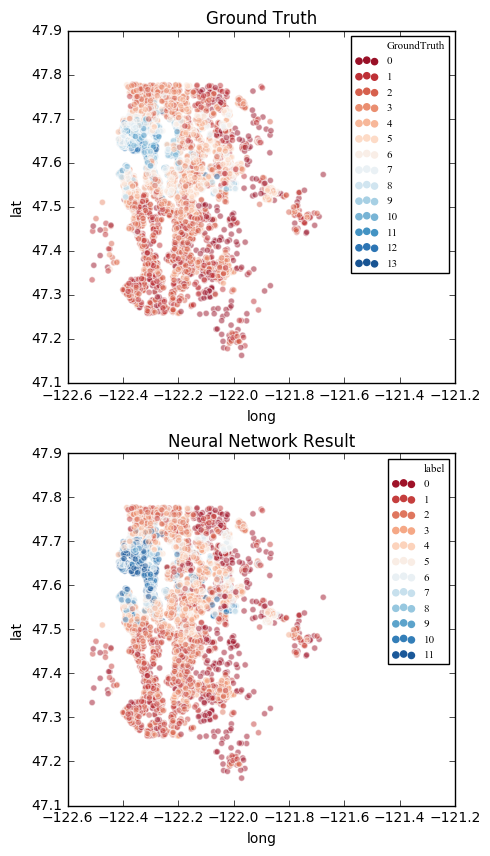

In [26]:
plt.figure(figsize=(5,10))
plotdata["label"] = predict
plotdata = plotdata.assign(isRight = plotdata.apply(setRight, axis = 1))
plt.subplot(2,1,1)
plt.title('Ground Truth') 
sns.scatterplot(x="long", y="lat", hue="GroundTruth", palette=sns.color_palette("RdBu", n_colors=14), data=plotdata, legend="brief", alpha=0.5)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.subplot(2,1,2)
plt.title('Neural Network Result')
sns.scatterplot(x="long", y="lat", hue="label", palette=sns.color_palette("RdBu", n_colors=12), data=plotdata, legend="brief", alpha=0.5)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.show()

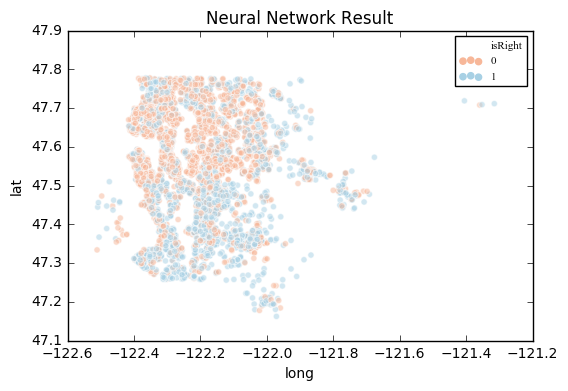

In [27]:
plt.title('Neural Network Result')
sns.scatterplot(x="long", y="lat", hue="isRight", palette=sns.color_palette("RdBu", n_colors=2), data=plotdata, legend="brief", alpha=0.5)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
#plt.savefig('Neural Network Result.png', dpi = 600)
plt.show()

countRight: 4413
Score: 0.816617320503


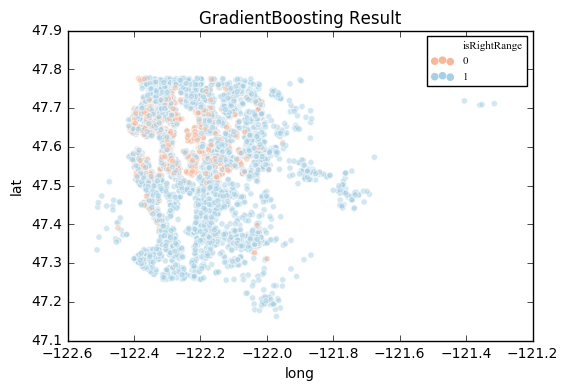

In [28]:
plotdata = plotdata.assign(isRightRange = plotdata.apply(setRightRange, axis = 1))
countRight = 0
for i in range(plotdata.shape[0]):
    if plotdata.iloc[i]["isRightRange"] == 1:
        countRight += 1
print("countRight:", countRight)
print("Score:", (countRight+0.0) / plotdata["isRightRange"].count())
plt.title('GradientBoosting Result')
sns.scatterplot(x="long", y="lat", hue="isRightRange", palette=sns.color_palette("RdBu", n_colors=2), data=plotdata, legend="brief", alpha=0.5)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.savefig('Neural Network Result Range.png', dpi = 600)
plt.show()